<a href="https://colab.research.google.com/github/RaTon84/Kaggle/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

hernnviltez_train_data_path = kagglehub.dataset_download('hernnviltez/train-data')
hernnviltez_test_data_path = kagglehub.dataset_download('hernnviltez/test-data')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Traer los datos

In [ ]:
df_train = pd.read_csv("/kaggle/input/train-data/train.csv")
df_test = pd.read_csv("/kaggle/input/test-data/test.csv")

## analizar


In [ ]:
print(df_train.duplicated().sum())
print(df_train.nunique())
df_train.isnull().sum()

0
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 1

In [ ]:
columnas_categoricas = df_train.select_dtypes(include=["object"]).columns
columnas_numericas = df_train.select_dtypes(include=["int64"]).columns

## EDA
Exploracion de datos analiticos

<Axes: xlabel='Survived', ylabel='count'>

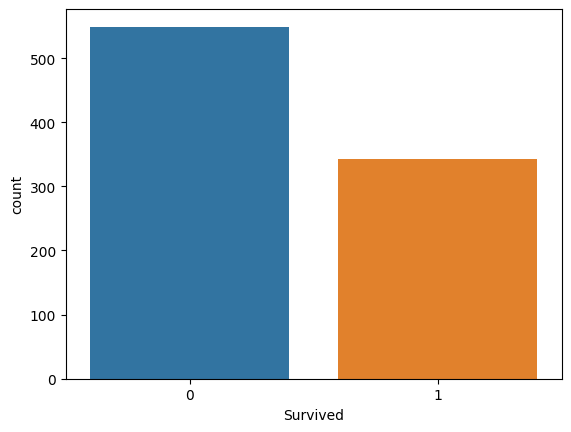

In [ ]:
sns.countplot(x="Survived", data=df_train)

<Axes: xlabel='Sex', ylabel='Survived'>

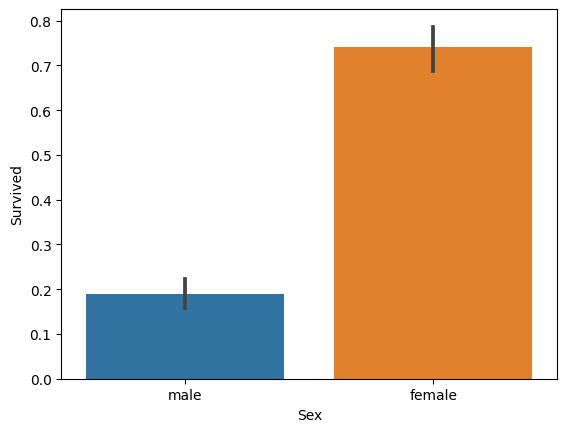

In [ ]:
sns.barplot(x="Sex", y="Survived", data=df_train)

## Conclusiones de la data
Columnas que no aportan a la prediccion por sus tantos valores distintos que contienen


In [ ]:
df_train.columns
df_train_drop = df_train.drop(columns=["Cabin","Fare","Ticket", "Name"])
df_test_drop= df_test.drop(columns=["Cabin","Fare","Ticket", "Name"])
df_train_drop.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


## Preparacion de los datos
Separacion de varibles predictoras y el target

In [ ]:
# Variables predictora
X= df_train_drop.drop(columns=["Survived"])
# Variable Target
y= df_train.Survived
# y
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,male,22.0,1,0,S
1,2,1,female,38.0,1,0,C
2,3,3,female,26.0,0,0,S
3,4,1,female,35.0,1,0,S
4,5,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,S
887,888,1,female,19.0,0,0,S
888,889,3,female,NaN,1,2,S
889,890,1,male,26.0,0,0,C


## Mutar varibales categoricas a numericas

from sklearn.preprocessing import OrdinalEncoder

In [ ]:
s=(X.dtypes=="object")
object_cols= list(s[s].index)
# X_columnas_categoricas = X.select_dtypes(include=["object"]).columns
# X_columnas_categoricas
object_cols

ordinal_encoder= OrdinalEncoder()
X[object_cols]= ordinal_encoder.fit_transform(X[object_cols])
df_test_drop[object_cols]= ordinal_encoder.fit_transform(df_test_drop[object_cols])
X.head()
# df_test_drop.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,1.0,22.0,1,0,2.0
1,2,1,0.0,38.0,1,0,0.0
2,3,3,0.0,26.0,0,0,2.0
3,4,1,0.0,35.0,1,0,2.0
4,5,3,1.0,35.0,0,0,2.0


## Rellenar valores nulos


In [ ]:
imputer= SimpleImputer()
x_transformed= pd.DataFrame(imputer.fit_transform(X))
x_transformed.columns= X.columns

# X.isnull().sum()
x_transformed.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

## Modelo machine Learning

In [ ]:
model=RandomForestClassifier()
model.fit(x_transformed, y)

RandomForestClassifier()

## Prediccion

In [ ]:
# df_test[object_cols]= ordinal_encoder.fit_transform(df_test[object_cols])
df_test_transformed= pd.DataFrame(imputer.transform(df_test_drop))
df_test_transformed.columns= df_test_drop.columns

# df_test_drop.isnull().sum()
predictions= model.predict(df_test_transformed)
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Sumnission

In [ ]:
output= pd.DataFrame({"PassengerId":df_test_drop.PassengerId, "survived":predictions})
output

# output.survived.sum()
# output.shape
# df_train.shape
# y.survived.sum()
# df_test_drop

,PassengerId,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
